In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Descriptive Statistics

Describe the data quantitatively.

* Central tendency: mean, median, and mode.
* Variability: standard deviation (or variance), minimum, maximum, kurtosis, and skewness.
* Graphical techniques.

## Terminology

* Mean: 平均數 = $ \mu $
* Median: 中位數
    * = the 2nd quartile = 第 2 四分位數
    * = $ Q_2 $
    * = the 50th percentile = 第 50 百分位數
* Mode: 眾數
* Variance: 變異數 = 方差 = $ \sigma^2 = E[(X - \mu)^2] $
    * E(X) = the [expected value](https://en.wikipedia.org/wiki/Expected_value) of random variable X ≈ mean
    * Expected value: 期望值
* Standard deviation: 標準差 = $ \sigma = \sqrt{\sigma^2} $
* Minimum: 最小值
* Maximum: 最大值
* Kurtosis: 峰度
* Skewness: 斜度
* Distribution: 分佈

## Expected Value

Let $ X $ represent the outcome of a roll of a fair six-sided die. The possible values for $ X $ are 1, 2, 3, 4, 5, and 6, all equally likely. The expectation of $ X $ is:
    
$ \operatorname {E} [X]=1\cdot {\frac {1}{6}}+2\cdot {\frac {1}{6}}+3\cdot {\frac {1}{6}}+4\cdot {\frac {1}{6}}+5\cdot {\frac {1}{6}}+6\cdot {\frac {1}{6}}=3.5. $

<img style="float: left; width: 50%;" alt="Largenumbers.svg" src="https://upload.wikimedia.org/wikipedia/commons/f/f9/Largenumbers.svg">
<div style="clear: both"></div>

## Mode, Median, and Mean

The basic advantage of the median in describing data compared to the mean is that it is not skewed so much by extremely large or small values, and so it may give a better idea of a "typical" value. Median income, for example, may be a better way to suggest what a "typical" income is.

<img style="float: left; width: 50%;" alt="Visualisation_mode_median_mean.svg" src="https://upload.wikimedia.org/wikipedia/commons/3/33/Visualisation_mode_median_mean.svg">
<div style="clear: both"></div>

Click to see the image: https://upload.wikimedia.org/wikipedia/commons/3/33/Visualisation_mode_median_mean.svg .

## Describe the Datasets

The explanations of the variables: 

* Star98: http://www.statsmodels.org/stable/datasets/generated/star98.html
* Fair: http://www.statsmodels.org/stable/datasets/generated/fair.html

In [3]:
star98_df = sm.datasets.star98.load_pandas().data
display(
    # here we don't want to show too many variables
    # `.iloc[:, :14]` means all rows and the first 14 cols
    star98_df.iloc[:, :14].head(),
    star98_df.iloc[:, :14].tail(),
    star98_df.dtypes,
)

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,0.0,22.222220
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,0.0,0.000000
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,0.0,0.000000
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,0.0,7.142857
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0.0,0.000000


,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
298,96.0,246.0,62.23968,13.820860,3.956157,32.12879,15.884480,13.27089,52.88133,4.324174,20.98711,8.00000,0.0,18.181820
299,37.0,117.0,46.16188,1.150575,0.800400,45.62281,13.333330,11.80714,48.42615,3.945069,19.85830,53.77358,0.0,0.000000
300,208.0,387.0,43.41431,3.648564,1.541204,46.31998,21.377670,14.40468,53.79616,3.845481,22.70884,29.89247,0.0,6.666667
301,199.0,510.0,70.62104,20.461720,2.989345,17.42305,11.032860,16.56420,61.70566,3.970984,24.88647,15.14286,0.0,13.636360
302,72.0,84.0,77.74827,5.998899,9.576225,11.11723,7.874016,16.91871,65.09957,6.913397,20.03252,23.52941,0.0,0.000000


NABOVE                     float64
NBELOW                     float64
LOWINC                     float64
PERASIAN                   float64
PERBLACK                   float64
PERHISP                    float64
PERMINTE                   float64
AVYRSEXP                   float64
AVSALK                     float64
PERSPENK                   float64
PTRATIO                    float64
PCTAF                      float64
PCTCHRT                    float64
PCTYRRND                   float64
PERMINTE_AVYRSEXP          float64
PERMINTE_AVSAL             float64
AVYRSEXP_AVSAL             float64
PERSPEN_PTRATIO            float64
PERSPEN_PCTAF              float64
PTRATIO_PCTAF              float64
PERMINTE_AVYRSEXP_AVSAL    float64
PERSPEN_PTRATIO_PCTAF      float64
dtype: object

In [4]:
star98_df.iloc[:, :14].describe()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,357.815182,525.389439,41.409877,5.896335,5.636808,34.398080,14.694747,14.253875,58.640258,4.320310,22.464250,33.630593,1.175909,11.611905
std,660.911376,1771.323315,20.467312,8.818136,8.795594,24.938683,12.307611,1.897354,5.243259,0.590411,2.212037,16.189408,6.008030,22.714399
min,4.000000,14.000000,0.000000,0.000000,0.000000,2.251407,0.000000,8.420029,39.728350,2.908312,14.316040,0.000000,0.000000,0.000000
25%,72.500000,98.000000,26.683040,0.877325,0.851290,13.919595,6.329114,13.028200,55.324300,3.941699,21.146010,23.450530,0.000000,0.000000
50%,199.000000,212.000000,40.236070,2.107896,2.179380,27.583130,11.111110,14.425880,58.880170,4.203244,22.508560,32.456140,0.000000,0.000000
75%,421.000000,542.500000,55.460075,7.184805,5.955982,47.617620,19.181675,15.512765,62.210985,4.513775,24.118690,41.803615,0.000000,12.310605
max,9324.000000,29528.000000,92.334500,63.202340,76.875000,98.821000,80.174930,20.545740,80.565040,6.913397,28.210850,89.130430,71.428570,100.000000


In [5]:
fair_df = sm.datasets.fair.load_pandas().data
display(
    fair_df.head(),
    fair_df.tail(),
    fair_df.dtypes,
)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [6]:
fair_df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


## The Relationships of Pairs – `corrcoef` + `heatmap`

In [7]:
# s: sub
sstar98_df = star98_df.iloc[:, :14]

In [8]:
sstar98_r_df = pd.DataFrame(
    data=np.corrcoef(sstar98_df.T),
    columns=sstar98_df.columns,
    index=sstar98_df.columns
)

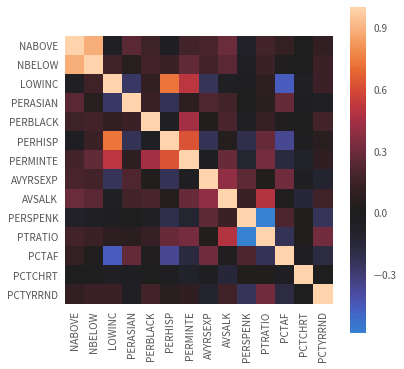

In [9]:
plt.figure(figsize=(6, 6))
sns.heatmap(sstar98_r_df, center=0, square=True)

The $ r $ is Pearson correlation coefficient, Pearson's $ r $:

- = 0: no linear relationship.
- \> 0.3: weak.
- \> 0.5: moderate.
- \> 0.7: strong.
- = 1: perfect.
- Can be negative linear relationship.

The $ r $ in graph:
    
<img style="float: left; width: 50%;" alt="1280px-Correlation_examples2.svg.png" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png">
<div style="clear: both"></div>

Correlation does not imply causation! Take a look at [spurious correlations](http://www.tylervigen.com/spurious-correlations).

In [10]:
fair_r_df = pd.DataFrame(
    data=np.corrcoef(fair_df.T),
    columns=fair_df.columns,
    index=fair_df.columns
)

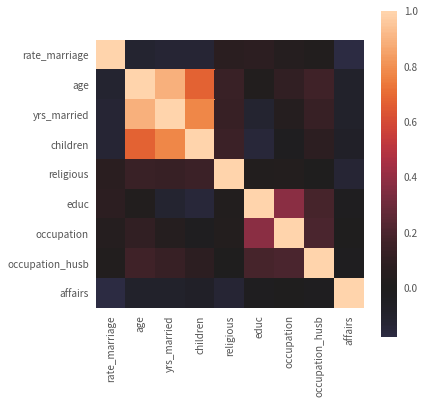

In [11]:
plt.figure(figsize=(6, 6))
sns.heatmap(fair_r_df, center=0, square=True)

## Star98

### The Distribution of Variable –  `distplot`

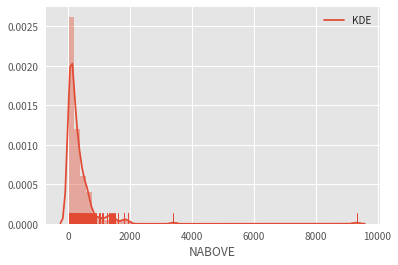

In [12]:
sns.distplot(
    star98_df.NABOVE,
    rug=True,
    kde_kws={'label': 'KDE'},
)

* $ x $: the values.
* $ y $: the percentage, and the univariate kernel density estimate (univariate KDE).

### Adjust Plotting Interactively – `plt`

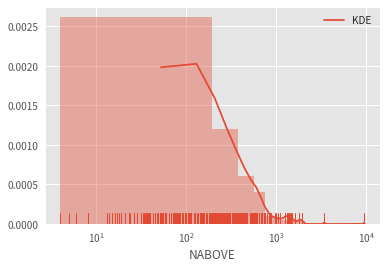

In [13]:
plt.xscale('log')
sns.distplot(
    star98_df.NABOVE,
    rug=True,
    kde_kws={'label': 'KDE'},
)

### The X-Y Relationship – `regplot`

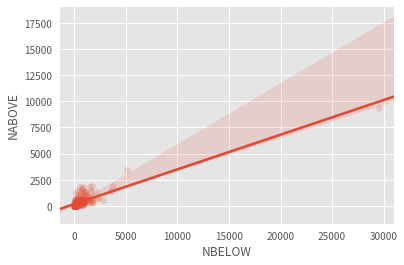

In [14]:
sns.regplot(
    data=star98_df,
    x='NBELOW', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

* Can $ x $ predict $ y $?

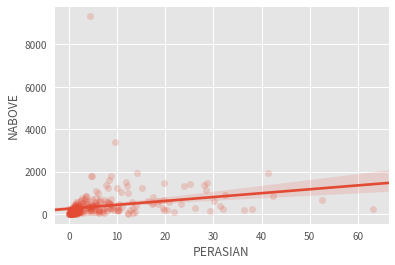

In [15]:
sns.regplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

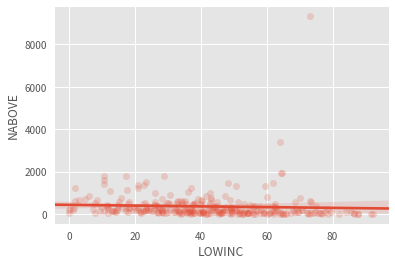

In [16]:
sns.regplot(
    data=star98_df,
    x='LOWINC', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

### The Relationships of Pairs + Distributions – `pairplot`

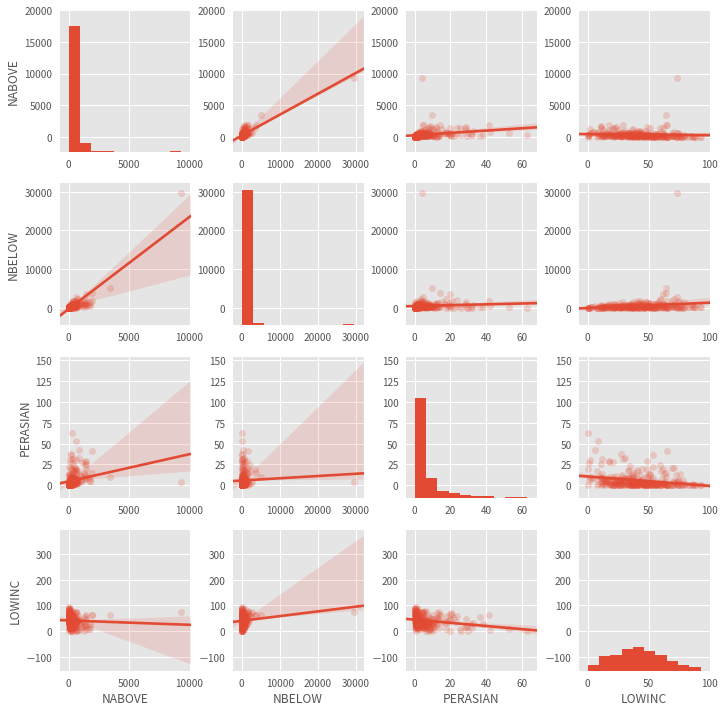

In [17]:
sns.pairplot(
    data=star98_df,
    vars=['NABOVE', 'NBELOW', 'PERASIAN', 'LOWINC'],
    kind='reg',
    plot_kws=dict(scatter_kws={'alpha': 0.2}),
)

### The Bivariate Relationship + Distributions – `jointplot`

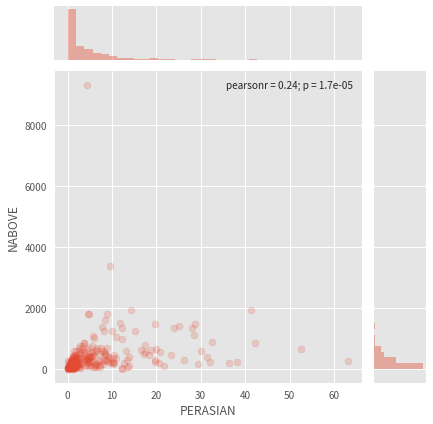

In [18]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='scatter',
    joint_kws={'alpha': 0.2},
)

The $ p $ here is a p-value which tests non-correlation, the probability of an uncorrelated system producing datasets that have a Pearson correlation. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

- < 0.001: extremely significant.
- < 0.01: very significant.
- < 0.05: significant.
- ≥ 0.05: not significant.

The $ r $ is Pearson correlation coefficient, Pearson's $ r $:

- = 0: no linear relationship.
- \> 0.3: weak.
- \> 0.5: moderate.
- \> 0.7: strong.
- = 1: perfect.
- Can be negative linear relationship.

The $ r $ in graph:
    
<img style="float: left; width: 50%;" alt="1280px-Correlation_examples2.svg.png" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png">
<div style="clear: both"></div>

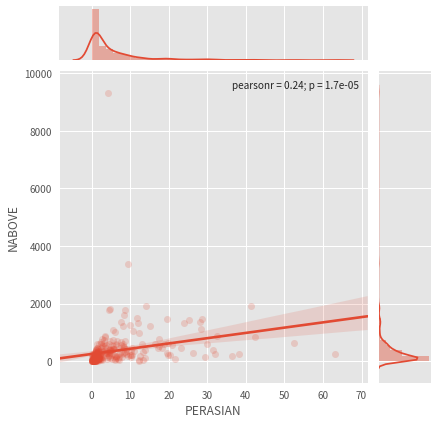

In [19]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='reg',
    joint_kws=dict(scatter_kws={'alpha': 0.2}),
)

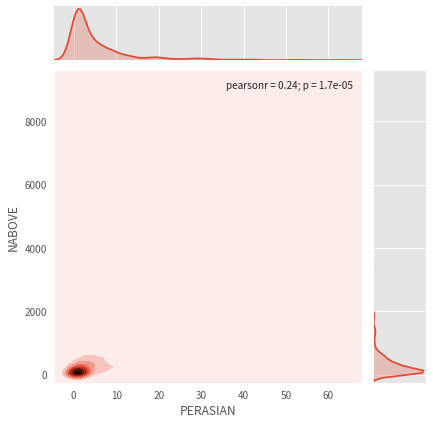

In [20]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='kde',  # kernel density estimate
)

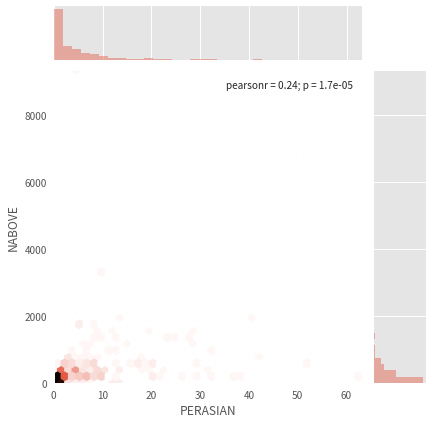

In [21]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='hex',  # hexbin
)

## Fair

### The Overview of Variables – `boxplot`

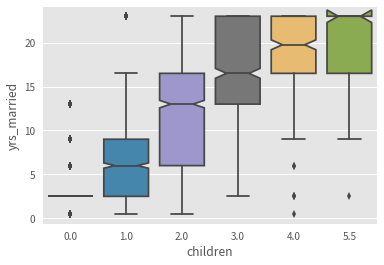

In [22]:
sns.boxplot(
    data=fair_df,
    x='children',
    y='yrs_married',
    notch=True
)

* Box: $Q_1$–$Q_3$ = 25th – 75th percentile = 50% of data.
* Line: the median = the 50th percentile.
* Whiskers:
   * $Q_1 - 1.5 IQR$, where $IQR = Q_3 - Q_1$.
   * $Q_3 + 1.5 IQR$.
   * = 99.3% of data if from a normal distribution.
* Points: the outliers out of 99.3% of data if from a normal distribution.
* Notch: 95% confidence interval (CI) of normal distribution.
   * Here the CI comes from Gaussian-based asymptotic approximation with no bootstrap.
   * The CI also can be $ median \pm 1.57\dfrac{IQR}{\sqrt{n}} $.
   * If the notches don't overlap, the means are significantly different.

### The Boxplots + Kernel Density Estimates – `violinplot`

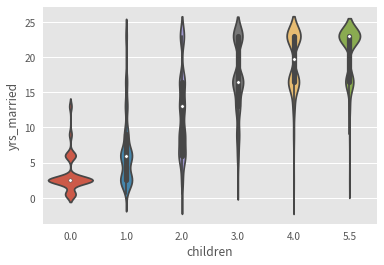

In [23]:
sns.violinplot(
    data=fair_df,
    x='children',
    y='yrs_married',
)

### The Faster Violinplot – `lvplot`

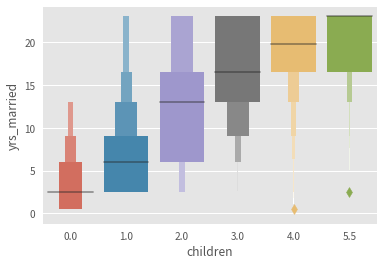

In [24]:
sns.lvplot(
    data=fair_df,
    x='children',
    y='yrs_married',
)

### The Point Estimates + Confidence Intervals – `barplot`

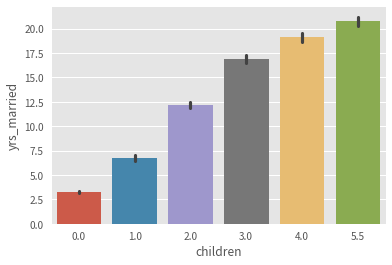

In [25]:
sns.barplot(
    data=fair_df,
    x='children',
    y='yrs_married',
)

* The height of a rectangle: an estimate of the mean from Gaussian-based asymptotic approximation by default.
* The bar: the 95% confident interval of the estimate with 1,000 bootstrap iterations by default.
    * If the bars don't overlap, the means are significantly different.

### The Categorical Plots on Grid – `factorplot`

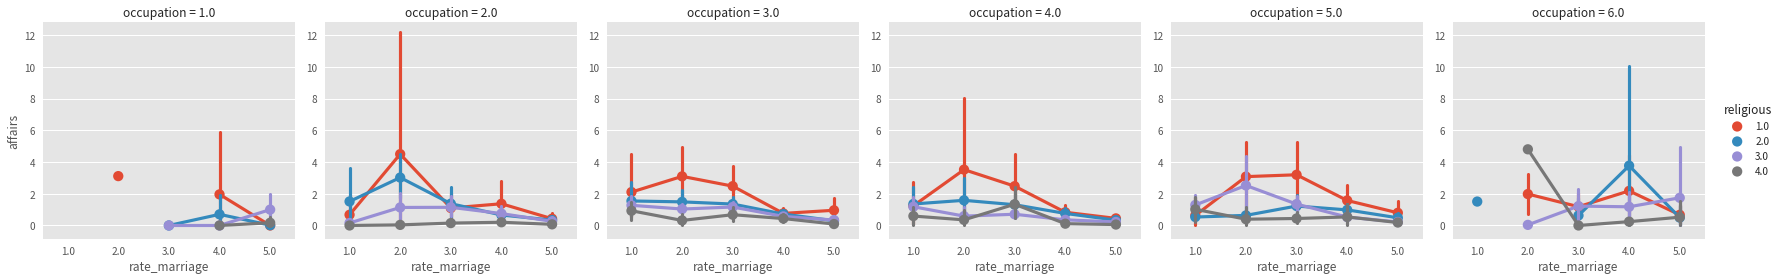

In [26]:
sns.factorplot(
    data=fair_df,
    y='affairs',
    x='rate_marriage',
    hue='religious',
    col='occupation',
)

## Dig More

* [The Python Graph Gallery](https://python-graph-gallery.com/)
* [API reference – seaborn](http://seaborn.pydata.org/api.html)
* [The Pyplot API – Matplotlib](https://matplotlib.org/api/pyplot_summary.html)
* [Boxplot - matplotlib](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)
* [Notched Box Plots – David's Statistics](https://sites.google.com/site/davidsstatistics/home/notched-box-plots)
* [Statistics – NumPy](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html)
* [Statistical functions – SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)
* [Pearson correlation coefficient – Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
* [P-value – Wikipedia](https://en.wikipedia.org/wiki/P-value)